# 1) Linear Regression

# 1.1) Regular linear regression

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [103]:
dftrain = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')

### creating function for cleaning the data
API:
- inputs are the training the test dataframes.
- outputs are three dataframes: test data, train data, and labels; note that the test data don't have labels.
- we drop the follow feature columns ['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'].
- we fill missing numerical data with their respective mean and categorical data with their respective median.

In [249]:
def DataConv(dftrain,dftest):
    # storing value in Xtrain variables
    Xtrain = dftrain.loc[:,'MSSubClass':'SaleCondition']
    Ytrain = pd.DataFrame(dftrain['SalePrice'])
    Xtest = dftest.loc[:,'MSSubClass':'SaleCondition']
    
    # combining all dataframes in a signle dataframe
    Xall = pd.concat([Xtrain,Xtest])
    Xall = Xall.reset_index(drop=True)
    
    # dropping highly missing feature columns
    Xall.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1,inplace=True)
    
    # filling missing numerical data with their repective means
    Xall = Xall.fillna(Xtrain.mean())
    
    # filling the missing categorical data with their median
    tmpD = Xall.isnull().sum(axis=0)
    cols = list(tmpD[tmpD>0].index)
    dic = {}
    for var in cols:
        dic[var] = (Xall[var].value_counts().index[0],Xall[var].value_counts().max())
        ind = Xall.isnull()[var][Xall.isnull()[var]].index
        Xall.loc[ind,var] = dic[var][0]
    
    # creating categorical data features
    categories = pd.get_dummies(Xall.select_dtypes(exclude=['floating','integer']))
    XallNumeric = Xall.select_dtypes(include=['floating','integer'])
    Xall = pd.concat([XallNumeric,categories],axis=1)
    
    # seperating train and test data
    Xtrain = Xall.iloc[Xtrain.index]
    Xtest = Xall.iloc[(Xtrain.index[-1]+1):]
    
    return (Xtrain,Ytrain,Xtest)

In [105]:
(Xtrain,Ytrain,Xtest) = DataConv(dftrain,dftest)

***note***

creating train-test split

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

***note***

Training the linear regression model

In [107]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

***note***

Calculating the prediction

In [108]:
pred = model.predict(X_test)

***note***

Calculating the squared-root of mean squared error and model score

In [109]:
from sklearn.metrics import mean_squared_error
srme = np.sqrt(mean_squared_error(y_test.as_matrix(),pred))
score = model.score(X_test,y_test)
print('RSME: {0:.2f}; score: {1:.3f}'.format(srme,score))

RSME: 29466.12; score: 0.882


## 1.2) Ridge regression

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [111]:
dftrain = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')

In [112]:
(Xtrain,Ytrain,Xtest) = DataConv(dftrain,dftest)

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [171]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.00005,normalize=False)
model.fit(X_train,y_train)
pred = model.predict(X_test)
srme = np.sqrt(mean_squared_error(y_test.as_matrix(),pred))
score = model.score(X_test,y_test)
print('RSME: {0:.2f}; score: {1:.3f}'.format(srme,score))

RSME: 29465.97; score: 0.882


In [167]:
from sklearn.linear_model import Ridge

nums = list(range(1,20+1,1))
nums.sort(reverse=True)
alphas = 1/np.array(nums)*100

errors = []
for alpha in alphas:
#     print(iter)
    model = Ridge(alpha=alpha)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    errors.append(np.sqrt(mean_squared_error(y_test.as_matrix(),pred)))

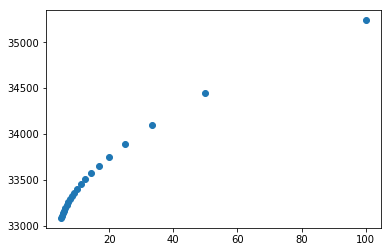

In [168]:
plt.scatter(alphas,errors)

## 1.3) Second order with Ridge regression

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [195]:
dftrain = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')

In [196]:
(Xtrain,Ytrain,Xtest) = DataConv(dftrain,dftest)

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [206]:
from sklearn.preprocessing import PolynomialFeatures
ploy = PolynomialFeatures(degree=2)
X_trainPoly = pd.DataFrame(ploy.fit_transform(X_train))
X_testPoly = pd.DataFrame(ploy.fit_transform(X_test))

In [207]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.00005,normalize=True)
model.fit(X_trainPoly,y_train)
pred = model.predict(X_testPoly)
srme = np.sqrt(mean_squared_error(y_test.as_matrix(),pred))
score = model.score(X_testPoly,y_test)
print('RSME: {0:.2f}; score: {1:.3f}'.format(srme,score))

RSME: 29407.47; score: 0.882


In [214]:
from sklearn.linear_model import Ridge

alphas = np.linspace(0.01,2,30)

errors = []
for alpha in alphas:
#     print(iter)
    model = Ridge(alpha=alpha,normalize=True)
    model.fit(X_trainPoly,y_train)
    pred = model.predict(X_testPoly)
    errors.append(np.sqrt(mean_squared_error(y_test.as_matrix(),pred)))

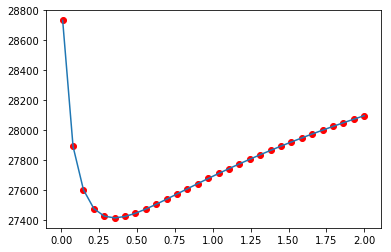

In [218]:
plt.scatter(alphas,errors,color='r')
plt.plot(alphas,errors)

In [213]:
np.linspace(0.01,2,30)

array([ 0.01      ,  0.07862069,  0.14724138,  0.21586207,  0.28448276,
        0.35310345,  0.42172414,  0.49034483,  0.55896552,  0.62758621,
        0.6962069 ,  0.76482759,  0.83344828,  0.90206897,  0.97068966,
        1.03931034,  1.10793103,  1.17655172,  1.24517241,  1.3137931 ,
        1.38241379,  1.45103448,  1.51965517,  1.58827586,  1.65689655,
        1.72551724,  1.79413793,  1.86275862,  1.93137931,  2.        ])

## 1.4 log transforming the labels

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [242]:
dftrain = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')

In [243]:
(Xtrain,Ytrain,Xtest) = DataConv(dftrain,dftest)

In [244]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

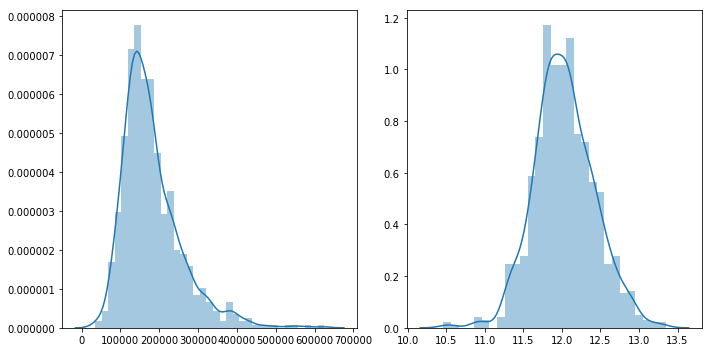

In [248]:
y_trainLog = y_train.apply(np.log1p)
y_testLog = y_test.apply(np.log1p)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(y_train)
plt.subplot(1,2,2)
sns.distplot(y_train.apply(np.log1p))
plt.tight_layout()

In [247]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.0005,normalize=True)
model.fit(X_train,y_trainLog)
pred = model.predict(X_test)
srme = np.sqrt(mean_squared_error(y_testLog.as_matrix(),pred))
score = model.score(X_test,y_testLog)
print('RSME: {0:.2f}; score: {1:.3f}'.format(srme,score))

RSME: 0.13; score: 0.901


## 1.5) features transformations

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [251]:
dftrain = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')

In [254]:
(Xtrain,Ytrain,Xtest) = DataConv(dftrain,dftest)

In [266]:
len(Xtrain.select_dtypes(include=['floating','integer']).loc[:,:'YrSold'].columns)

36

In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

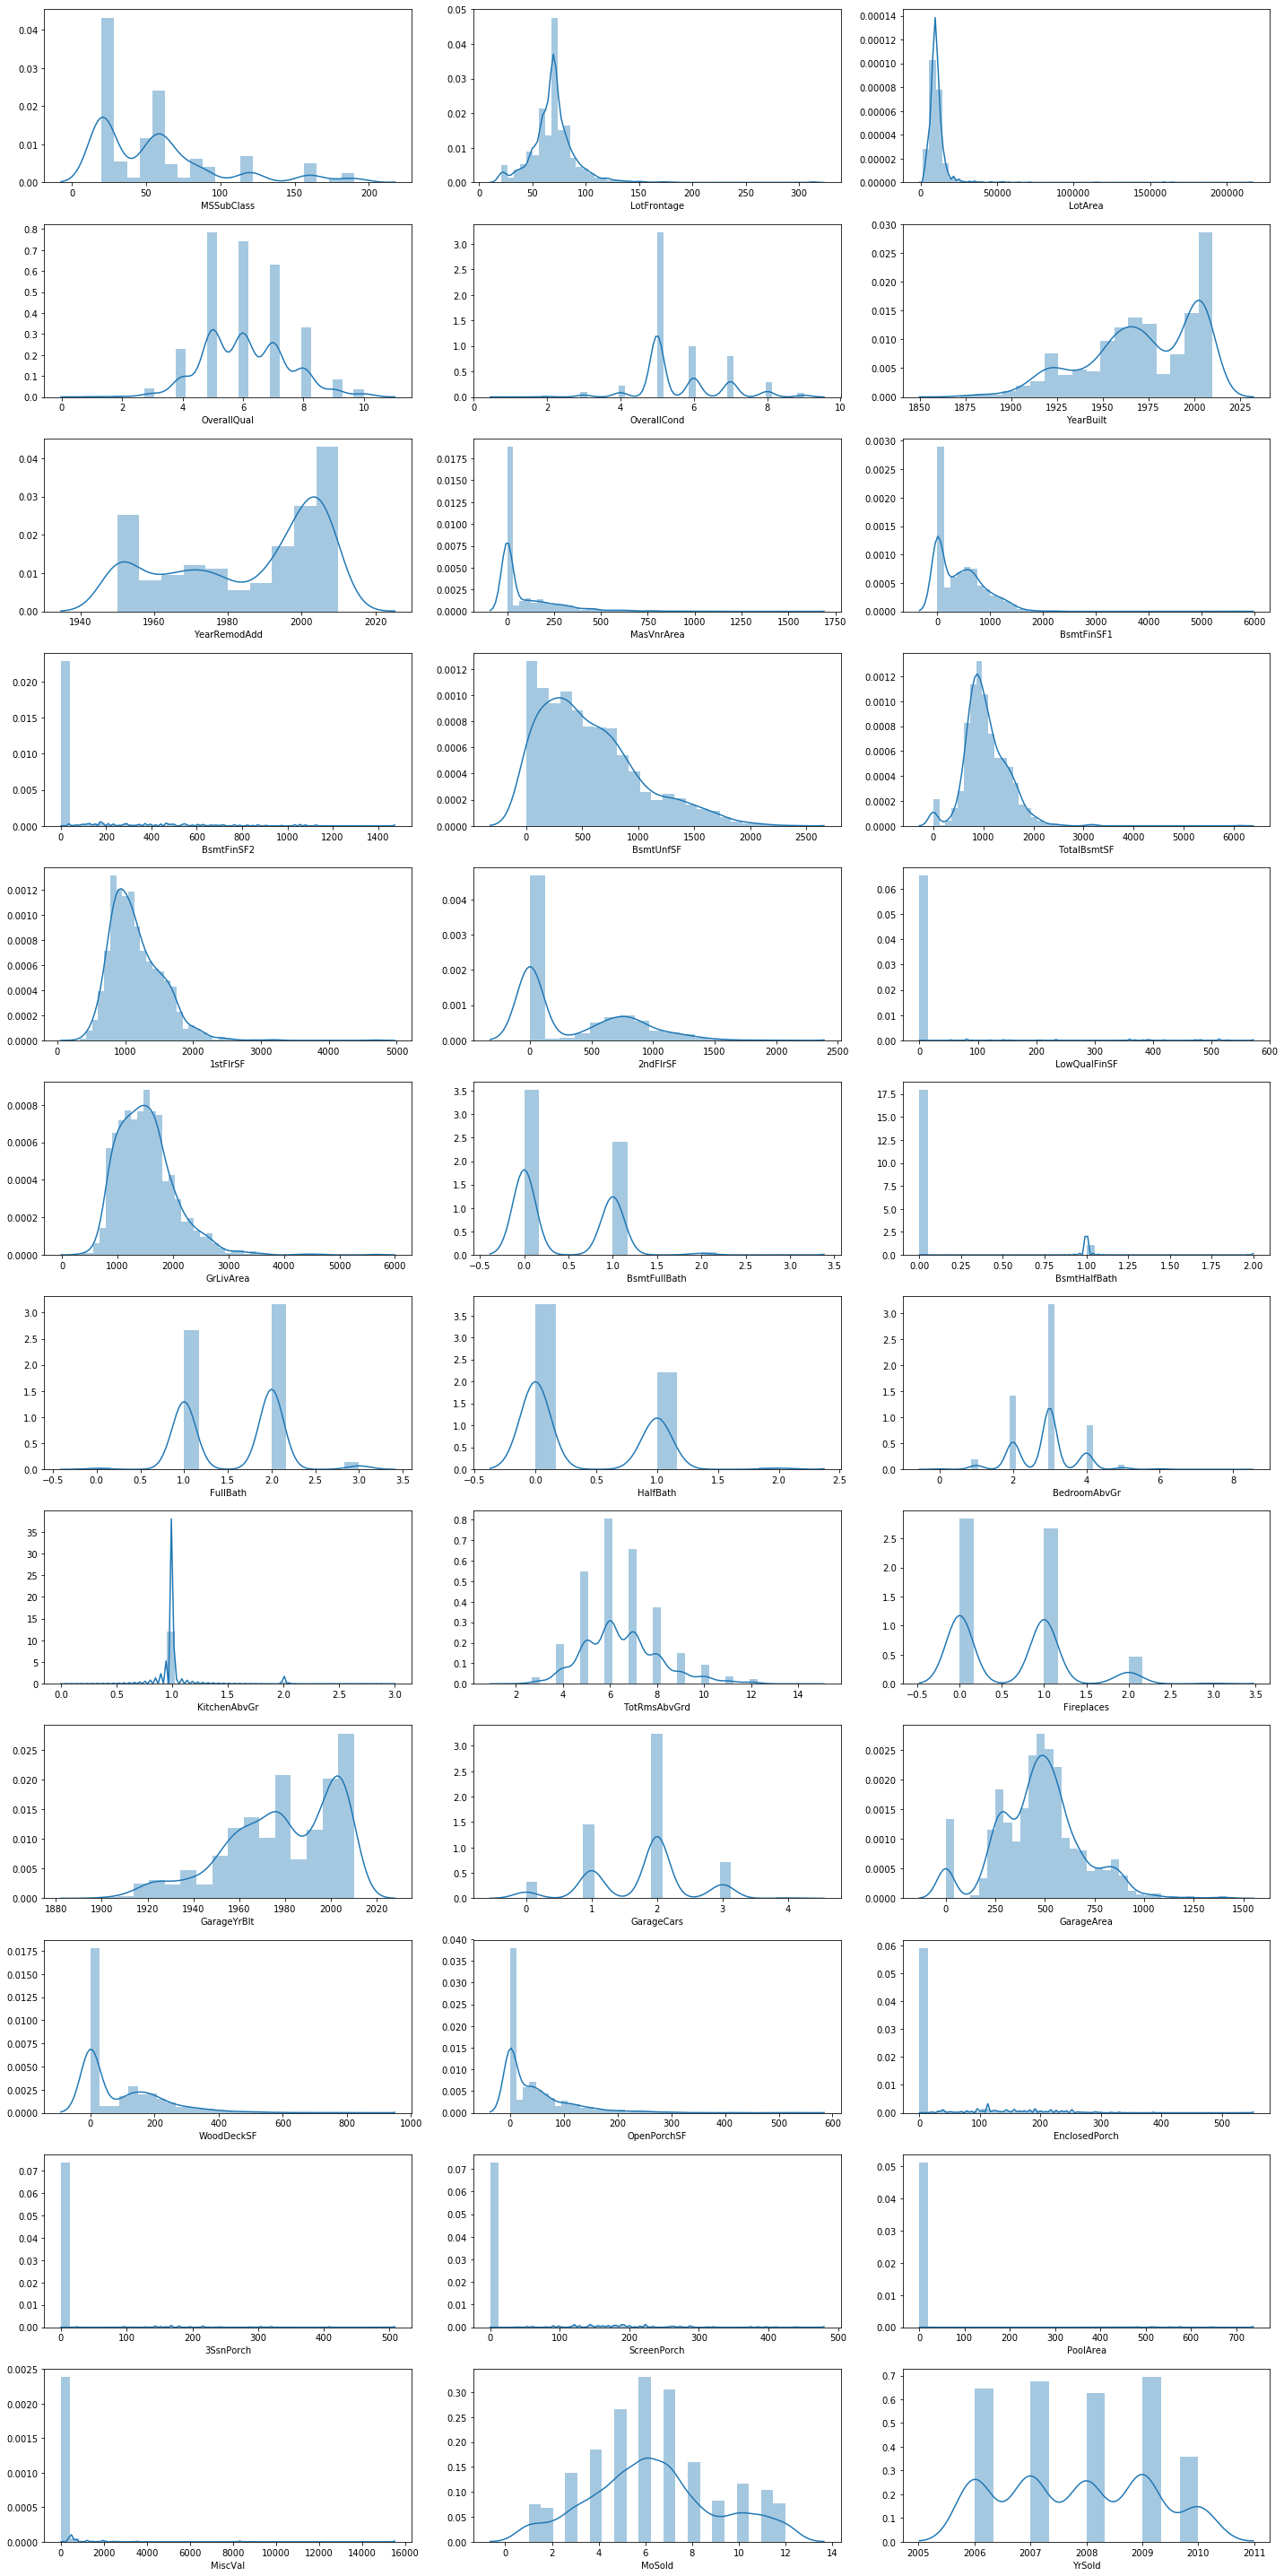

In [270]:
plt.figure(figsize=(20,40))
figLoc = 0

histData = Xtrain.select_dtypes(include=['floating','integer']).loc[:,:'YrSold']
cols = list(histData.columns)

for i in range(1,12+1):
    for ii in range(1,3+1):
        figLoc+=1
#         print(figLoc)
#         print('i={}; ii={}'.format(i,ii))
        plt.subplot(12,3,figLoc)
        sns.distplot(histData[cols[figLoc-1]])
plt.tight_layout()